# Analyze the usage.csv in this folder

In [1]:
import csv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## data description

df2 usage_cpu_e3_t25_main.csv: CPU only transforms
df3 usage_e3_t25_gpu_transforms.csv: GPU transforms but with transfer to the CPU
df4 data/usage_cpu_torch_empty_cuda_e3_t25.csv: Experiment with CPU only transform but resetting the CUDA cache on every iteration -> Learn how deep the memory sinks in between iterations
df5 data/usage_GPU_transforms_e5_little_cpu_transfer.csv


Missing:
3) Debug batch data and see where else data might be on the GPU..


In [2]:
df1 = pd.read_csv('data/2/usage.csv')
df2 = pd.read_csv('data/usage_cpu_e3_t25_main.csv')
df3 = pd.read_csv('data/usage_e3_t25_gpu_transforms.csv')
df4 = pd.read_csv('data/usage_cpu_torch_empty_cuda_e3_t25.csv')
df5 = pd.read_csv('data/usage_GPU_transforms_e5_little_cpu_transfer.csv')
df = df5

In [3]:
print(df.describe())

        device  context   utilization  total memory (MB)  free memory (MB)  \
count  25349.0      0.0  25349.000000            25349.0      25349.000000   
mean       1.0      NaN     30.883427            81920.0      36881.338317   
std        0.0      NaN     42.785854                0.0      22136.774114   
min        1.0      NaN      0.000000            81920.0        425.000000   
25%        1.0      NaN      0.000000            81920.0      19735.000000   
50%        1.0      NaN      0.000000            81920.0      29745.000000   
75%        1.0      NaN     91.000000            81920.0      54209.000000   
max        1.0      NaN    100.000000            81920.0      80403.000000   

       used memory (MB)  memory not used by torch (MB)  
count      25349.000000                    25349.00000  
mean       45038.661683                      819.88252  
std        22136.774114                        6.61335  
min         1517.000000                      146.00000  
25%        2

In [4]:
df["time"] = pd.to_datetime(df["time"])

array([<Axes: >], dtype=object)

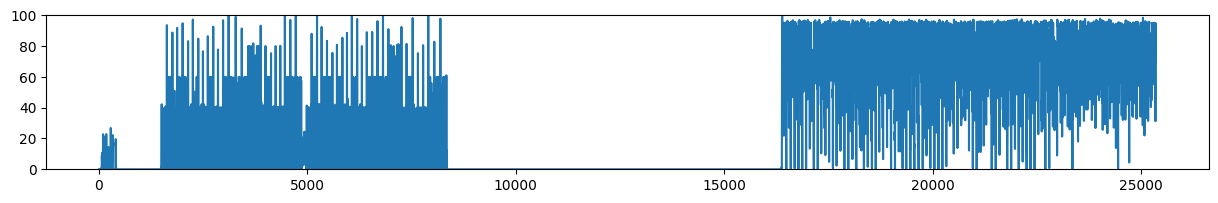

In [11]:
util = df.loc[:,"utilization"].rolling(5).sum()  / 5
util.plot(subplots=True, figsize=(15,2),ylim=(0,100))

In [6]:
# df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'].plot(
#     subplots=True, 
#     figsize=(15,10), 
#     ylim=(0,df.loc[:,"total memory (MB)"][0]))


In [7]:
# pd.DataFrame.plot(df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'], subplots=True, 
#                 figsize=(15,10), 
#                 ylim=(0,df.loc[:,"total memory (MB)"][0]))

In [8]:
df["used memory moving average"] = df.loc[:,"used memory (MB)"].rolling(200).sum()  / 200

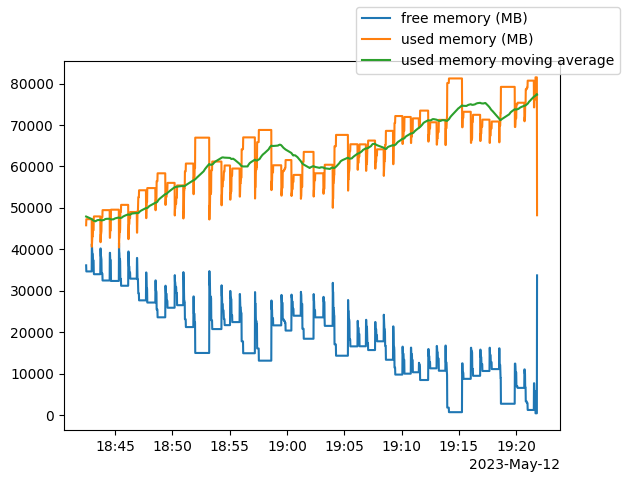

In [39]:
plot, ax = plt.subplots()
from_tick = 23000
for i in ("free memory (MB)", "used memory (MB)", "used memory moving average"):
    ax.plot(df.loc[from_tick:, 'time'], df.loc[from_tick:, i], label=i)
    
plot.legend()

cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

In [32]:
df.columns
df.shape[0]
df.loc[18000:, 'time']
# df.loc[:," total memory (MB)"][0]
# df.loc[:," Memory not used by torch (MB)"][10]

18000   2023-05-12 17:18:43
18001   2023-05-12 17:18:44
18002   2023-05-12 17:18:45
18003   2023-05-12 17:18:46
18004   2023-05-12 17:18:47
                ...        
25344   2023-05-12 19:21:45
25345   2023-05-12 19:21:46
25346   2023-05-12 19:21:47
25347   2023-05-12 19:21:48
25348   2023-05-12 19:21:49
Name: time, Length: 7349, dtype: datetime64[ns]